# Browser Support for HTML Tags and CSS properties - How accessible is the web?

In order for people who use screen readers to perceive content on the web, they rely on the proper use of HTML tags, CSS properties, and JavaScript widgets to work correctly with the [Accessibility API](https://www.w3.org/TR/core-aam-1.1/).

There are several different browsers, as well as screen readers. Depending on which screen reader is used with which browser, the outcome slightly defers. 

Not every browser supports all [HTML tags](https://developer.mozilla.org/en-US/docs/Web/HTML/Element) and [CSS properties](https://developer.mozilla.org/en-US/docs/Web/CSS/Reference#Keyword_index) currently out there, but the team behind it (link to [WCAG](https://www.w3.org/Translations/WCAG20-de/) or [CSS working group](https://www.w3.org/groups/wg/css)) is constantly working on updates and supports to make the user experience to screen reader users the same as for users, who do not rely screen readers.

Here is an example how browser support is generally shown by web sites like [Caniuse](https://caniuse.com/).

![Browser Support element aside](assets/html_semantic_elements.png)

And here an example on an specific element.

![Browser Support element aside](assets/html_element_aside.png)

## What is this project about?

With this project I want to show my progress I made during the semester of "Introduction to DH Tools and Methods" held by Renato Rocha Souza.

>Even though my code is not very advanced, let me guide you through the project with all my thoughts as well as struggels I had during the time I tried to create this project. There were a lot. Let me explain, in a more open and funny way, what I tried to achieve, let me show the outcome and what I want to do in the future.


By using the following data sets and techniques, I want to answer following questions:

- How many HTML tags and CSS properties are supported?
- Does every browser support the same (ammount) of HTML tags and CSS props?
- Which browser supports the most tags and props?
- How did browser support for HTML tags and CSS properties change over the years?
- How did browsers develop over the years?

Data sets used:
- MDN to each [HTML tag](https://developer.mozilla.org/en-US/docs/Web/HTML/Element) and [CSS prop](https://developer.mozilla.org/en-US/docs/Web/CSS/)

Techniques used:
- [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/)
- [Pandas](https://pandas.pydata.org/docs/)
- [Matplotlib](https://matplotlib.org/)

Relevant for further information
- [Caniuse](https://caniuse.com/)
- [Article on browser compatibility by MDN](https://hacks.mozilla.org/2018/03/hack-on-mdn-building-useful-tools-with-browser-compatibility-data/)

I am going to print out all HTML tags and CSS properties using Beautiful Soup. Statistics will be done using Pandas and visualization with Matplotlib. - First get a list of all tags and properties, then going into more advanced visualization of the data.

## Get all HTML tags and CSS properties

I am starting my first attemped on getting all HTML tags and CSS properties by using Beautiful Soup library.

### HTML tags

Let's start with listing all the HTML tags in a table and count how many HTML tags exist.

In [1]:
from bs4 import BeautifulSoup
import requests

url = "https://developer.mozilla.org/en-US/docs/Web/HTML/Element"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

get_nav_tag = soup.find("nav", class_="sidebar-inner")
get_second_div = get_nav_tag.find_all("div")[2]
get_ol = get_second_div.find("ol")
get_li = get_second_div.find_all("li", class_="toggle")[3]

tag_list = get_li.find_all("code")

In [2]:
# This is definitely not a very readable and advanced approach to fetch some data, but, hey, I am still learning :)

#### How many HTML do currently exist?

In [3]:
print("There are currently", len(tag_list), "tags.")

There are currently 134 tags.


**What is happening in this piece of code:**


1. In order to use Beautiful soup with all its options I imported the latest version of it. Since I want to request data from the DOM I also have to import requests.
2. Then I am storing the URL I want to get the data from in a variable called url.
3. Next I make a GET request to fetch the raw HTML content.
4. To use the content I have to parse it in a language Python can understand by using Beautiful Soup.
5. Since the website itself has much content on it, I have to be more specific about the data I want to parse. Do get deeper into the DOM, I first look for the `div` the list is in by using the `.find()` method and then get the specific data with the `.findAll()` method.
6. To get the number of how many HTML tags exists, I used the `len` method.
6. To list all the HTML tags of the web page I finally run a `for loop` and `print` the tags, as seen in the next step.

In [4]:
for tags in tag_list:
    print(tags.text)
    # or use print(tags.text, end= '\t') to print all the tags in a single line and save some space.

<a>
<abbr>
<acronym>
<address>
<applet>
<area>
<article>
<aside>
<audio>
<b>
<base>
<bdi>
<bdo>
<bgsound>
<big>
<blink>
<blockquote>
<body>
<br>
<button>
<canvas>
<caption>
<center>
<cite>
<code>
<col>
<colgroup>
<content>
<data>
<datalist>
<dd>
<del>
<details>
<dfn>
<dialog>
<dir>
<div>
<dl>
<dt>
<em>
<embed>
<fieldset>
<figcaption>
<figure>
<font>
<footer>
<form>
<frame>
<frameset>
<h1>
<head>
<header>
<hgroup>
<hr>
<html>
<i>
<iframe>
<image>
<img>
<input>
<ins>
<kbd>
<keygen>
<label>
<legend>
<li>
<link>
<main>
<map>
<mark>
<marquee>
<menu>
<menuitem>
<meta>
<meter>
<nav>
<nobr>
<noembed>
<noframes>
<noscript>
<object>
<ol>
<optgroup>
<option>
<output>
<p>
<param>
<picture>
<plaintext>
<portal>
<pre>
<progress>
<q>
<rb>
<rp>
<rt>
<rtc>
<ruby>
<s>
<samp>
<script>
<section>
<select>
<shadow>
<slot>
<small>
<source>
<spacer>
<span>
<strike>
<strong>
<style>
<sub>
<summary>
<sup>
<table>
<tbody>
<td>
<template>
<textarea>
<tfoot>
<th>
<thead>
<time>
<title>
<tr>
<track>
<tt>
<u>
<ul>
<

### Accessibility problems with HTML Tags
Since HTML5 showed up in 2008 some of these HTML tags are already **deprecated**, which means, the usage of these tags brings some certain risk:
They may get no support from the browser anymore. This could lead in a unexpacted behaviour not being able to interact with the website as the user wanted.

This is especially problematic for screen reader users who rely on the correct usage of **[semantic HTML](https://developer.mozilla.org/en-US/docs/Glossary/Semantics)**, in order to be able perceive all the information of the website and interact with it.

### CSS Properties

All HTML tags are fetched, now I am going to do the same with all the CSS properties.

In [5]:
from bs4 import BeautifulSoup
import requests

url = "https://developer.mozilla.org/en-US/docs/Web/CSS/Reference#Keyword_index"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

props_list = soup.find("div", id="sect2")
props = props_list.find_all("code")

print("There are currently", len(props), "properties.")

# to keep the list short I only print out the first 20 out of 732 properties using enumerate
for i, prop in enumerate(props[:20]):
    print(prop.text)

print("...")

There are currently 732 properties.
--*
-webkit-line-clamp
abs()
accent-color
acos()
:active
additive-symbols (@counter-style)
::after (:after)
align-content
align-items
align-self
align-tracks
all
<an-plus-b>
<angle>
<angle-percentage>
animation
animation-composition
animation-delay
animation-direction
...


Since the list of HTML tags and CSS properties is pretty long, and using `end= '\t'` to print it in a single line doesn't really seem readable, I decide on storing the data in a table and sort all tags alphabetically.
This is were pandas comes into play.

## Pandas


In [6]:
import pandas as pd

tag_data = []
for tag in tag_list:
    tag_data.append({"Tags": tag.text})

df = pd.DataFrame(tag_data)
df

,Tags
0,<a>
1,<abbr>
2,<acronym>
3,<address>
4,<applet>
...,...
129,<ul>
130,<var>
131,<video>
132,<wbr>


I was able to get all tags in a table. But this is still not what I want my output to look like. I want to create a table were all tags are separated alphabetically. Therefore I added some additional information for the program to operate the task.

I tried different approaches to get each element in a separate column (using lambda, trying to convert the list, to be able to work with it or create a string out of it, but nothing seemed to work. I guess, being still a newbie working with data and unfamiliar with all the different libraries is the reason for that.

But that does not keep me creating some work arounds of course.

### Work around - no I am not ashamed (holding back tears)

To still be able to work with the data fetched with Beautiful Soup I stored the data in an csv file per hand, and I am going to import it in order to do create tables and graphs with the collected data.

In [7]:
my_file = open('./assets/HTML_Tags.csv', encoding='utf8')

from csv import reader
read_file = reader(my_file)
tag_data_set = list(read_file)

df = pd.DataFrame(tag_data_set)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Tag_A,Tag_B,Tag_C,Tag_D,Tag_E,Tag_F,Tag_G,Tag_H,Tag_I,Tag_J,...,Tag_Q,Tag_R,Tag_S,Tag_T,Tag_U,Tag_V,Tag_W,Tag_X,Tag_Y,Tag_Z
1,<a>,<b>,<canvas>,<data>,<em>,<fieldset>,,<h1>,<i>,,...,<q>,<rb>,<s>,<table>,<u>,<var>,<wbr>,<xmp>,,
2,<abbr>,<base>,<caption>,<datalist>,<embed>,<figcaption>,,<head>,<iframe>,,...,,<rp>,<samp>,<tbody>,<ul>,<video>,,,,
3,<acronym>,<bdi>,<center>,<dd>,,<figure>,,<header>,<image>,,...,,<rt>,<script>,<td>,,,,,,
4,<address>,<bdo>,<cite>,<del>,,<font>,,<hgroup>,<img>,,...,,<rtc>,<section>,<template>,,,,,,
5,<applet>,<bgsound>,<code>,<details>,,<footer>,,<hr>,<input>,,...,,<ruby>,<select>,<textarea>,,,,,,
6,<area>,<big>,<col>,<dfn>,,<form>,,<html>,<ins>,,...,,,<shadow>,<tfoot>,,,,,,
7,<article>,<blink>,<colgroup>,<dialog>,,<frame>,,,,,...,,,<slot>,<th>,,,,,,
8,<aside>,<blockquote>,<content>,<dir>,,<frameset>,,,,,...,,,<small>,<thead>,,,,,,
9,<audio>,<body>,,<div>,,,,,,,...,,,<source>,<time>,,,,,,


Yeah, looks much better!

In [8]:
get_col_a = tag_data_set[0][0]
get_col_b = tag_data_set[0][1]
get_col_c = tag_data_set[0][2]

get_a = []
get_b = []
get_c = []

for col in tag_data_set[1:]:
    Tag_A = col[0]
    get_a.append(Tag_A)
    
while("" in get_a):
    get_a.remove("")
    
for col in tag_data_set[2:]:
    Tag_B = col[1]
    get_b.append(Tag_B)
    
while("" in get_b):
    get_b.remove("")
    
for col in tag_data_set[3:]:
    Tag_C = col[2]
    get_c.append(Tag_C)
    
while("" in get_c):
    get_c.remove("")

print(get_a)
print(get_b)
print(get_c)

['<a>', '<abbr>', '<acronym>', '<address>', '<applet>', '<area>', '<article>', '<aside>', '<audio>']
['<base>', '<bdi>', '<bdo>', '<bgsound>', '<big>', '<blink>', '<blockquote>', '<body>', '<br>', '<button>']
['<center>', '<cite>', '<code>', '<col>', '<colgroup>', '<content>']


It would be a huge advantage to know how to work with loops correctly, to avoid DRY (don't repeat yourself). Instead of writing the same code 3 times to fetch the data from column Tag_A, Tag_B, Tag_C, you can work with a for loop, and a loop within a loop to store the data of each column in a separate list to do further approaches.

**Note:** But not that I know how to do that at my current state of knowledge. Sorry!

## Matplotlib

Let's demonstrate how to create a bar chart out of this.

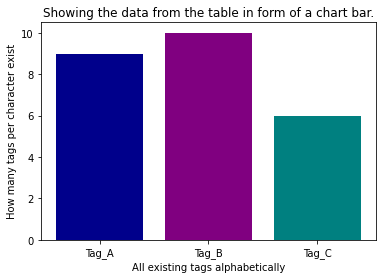

In [9]:
import matplotlib.pyplot as plt

x_axis = [get_col_a, get_col_b, get_col_c]
y_axis = [len(get_a), len(get_b), len(get_c)]

colors = ['darkblue', 'purple','teal']
plt.bar(x_axis, y_axis, color=colors)
plt.title('Showing the data from the table in form of a chart bar.')
plt.xlabel('All existing tags alphabetically')
plt.ylabel('How many tags per character exist')
plt.show()

In case you are asking yourself why I would create a bar chart of showing, how many tags are there according to their first charakter. The reason is, that I somehow want to practice how to create a bar chart, even though the data visualization does not make much sense.
When I get more familiar with finding research question and what I want to present, I am at least already familliar with how to create a bar chart using Matplotlib.

## What's next?

For further research I want to add more information into the data table, like
- if the element is deprecated
- if the HTML tag has semantic meaning
- create some sort of meaning of tags and props

The same counts for the CSS properties data. A rearrangement of columns and rows would make sense for adding new information for each element.

Further I want to scrape data to the most used browsers, Google Chrome, Mozilla Firefox, Safari, Edge and how their support on each HTML tag and CSS property is. A comparison of which browser does support the most tags and props would be lead to another data visualization, propabliy a bar chart.

Interesting would also be what sort of HTML tags and CSS props are supported, like, some which are used quite often or used for specific purposes.

In the end I also want to find out how the browser support of each browser has changed over the years. Was the browser, which does now support the most tags also supported the most 5 years ago? These kind of questions. For this purpose, maybe a line chart would be a good choice

The project is just in its baby shoes but I tried to show what I have learned over the past few weeks as best as I could and I am eager to dive deeper into Jupiter Notebook, Python, Pandas and Matpotlib to continue working on this projects over the upcoming weeks/months.